In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


In [82]:
df = pd.read_csv("C:\\Users\Rishabh Kumar\\Downloads\\modified_rainfall_prediction_data.csv")
df.head()

,day,pressure,maxtemp,temprature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1029.290904,33.555385,25.584640,26.157128,13.626515,94.594617,15.209398,no,5.088970,67.922814,18.333422
1,2,1022.644333,23.197899,24.238538,28.340698,17.648192,82.498755,82.367584,yes,1.510746,33.992427,24.926312
2,3,1019.437616,25.680720,30.439048,25.969499,16.332841,69.550263,35.644089,no,6.084110,77.646621,19.648195
3,4,1016.388285,21.754189,31.735491,20.233639,15.975832,84.494778,74.833406,yes,3.209557,92.685254,27.102413
4,5,1026.750984,23.290538,24.527307,24.719635,16.591392,98.671789,94.889545,yes,2.972657,99.884152,26.680271


In [83]:
#Checking the size of dataset
df.shape

(365, 12)

In [84]:
#Checking for the data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            365 non-null    int64  
 1   pressure       365 non-null    float64
 2   maxtemp        365 non-null    float64
 3   temprature     365 non-null    float64
 4   mintemp        365 non-null    float64
 5   dewpoint       365 non-null    float64
 6   humidity       365 non-null    float64
 7   cloud          365 non-null    float64
 8   rainfall       365 non-null    object 
 9   sunshine       365 non-null    float64
 10  winddirection  364 non-null    float64
 11  windspeed      364 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 34.3+ KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,365.0,183.000000,105.510663,1.000000,92.000000,183.000000,274.000000,365.000000
pressure,365.0,1019.958178,5.684253,1010.117662,1014.891509,1020.251124,1024.489607,1029.979039
maxtemp,365.0,25.904537,4.381208,20.032340,22.328809,24.193627,29.964678,34.762990
temprature,365.0,25.781650,4.311170,18.056818,22.134741,25.628264,29.619505,32.921184
mintemp,365.0,22.417112,4.232318,15.012368,19.078426,22.408333,25.874165,29.971215
dewpoint,365.0,15.942169,2.687889,10.002263,14.247585,16.268436,18.287113,19.985393
humidity,365.0,83.136913,11.456575,60.261532,74.144335,84.494778,93.250978,99.791561
cloud,365.0,61.429562,29.701676,0.346512,37.399971,72.790211,85.994219,99.904130
sunshine,365.0,4.007896,2.749712,0.017425,1.581383,3.516733,6.072985,9.981995
winddirection,364.0,49.865517,29.922352,0.059763,22.671565,50.514572,74.669251,99.905170


In [86]:
#Data-Preprocessing
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temprature       0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [87]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temprature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [88]:
#Null value imputation
for col in df.columns:

# Checking if the column contains any null values
    if df[col].isnull().sum() > 0:
    	val = df[col].mean();df[col] = df[col].fillna(val)
	
df.isnull().sum().sum()


0

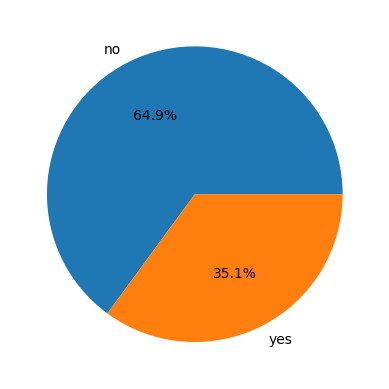

In [89]:
#Exploratory data analysis
plt.pie(df['rainfall'].value_counts().values,
		labels = df['rainfall'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [90]:
df.groupby('rainfall').mean()


,day,pressure,maxtemp,temprature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,179.881857,1019.81216,27.689655,25.667745,22.196237,15.108590,79.389815,48.929859,4.817324,48.651438,15.517642
yes,188.773438,1020.22854,22.599279,25.992551,22.826076,17.485591,90.074898,84.573544,2.509190,52.113460,25.353085


In [91]:
#Removing unnecessary day column from the datasets
features = list(df.select_dtypes(include=np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temprature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


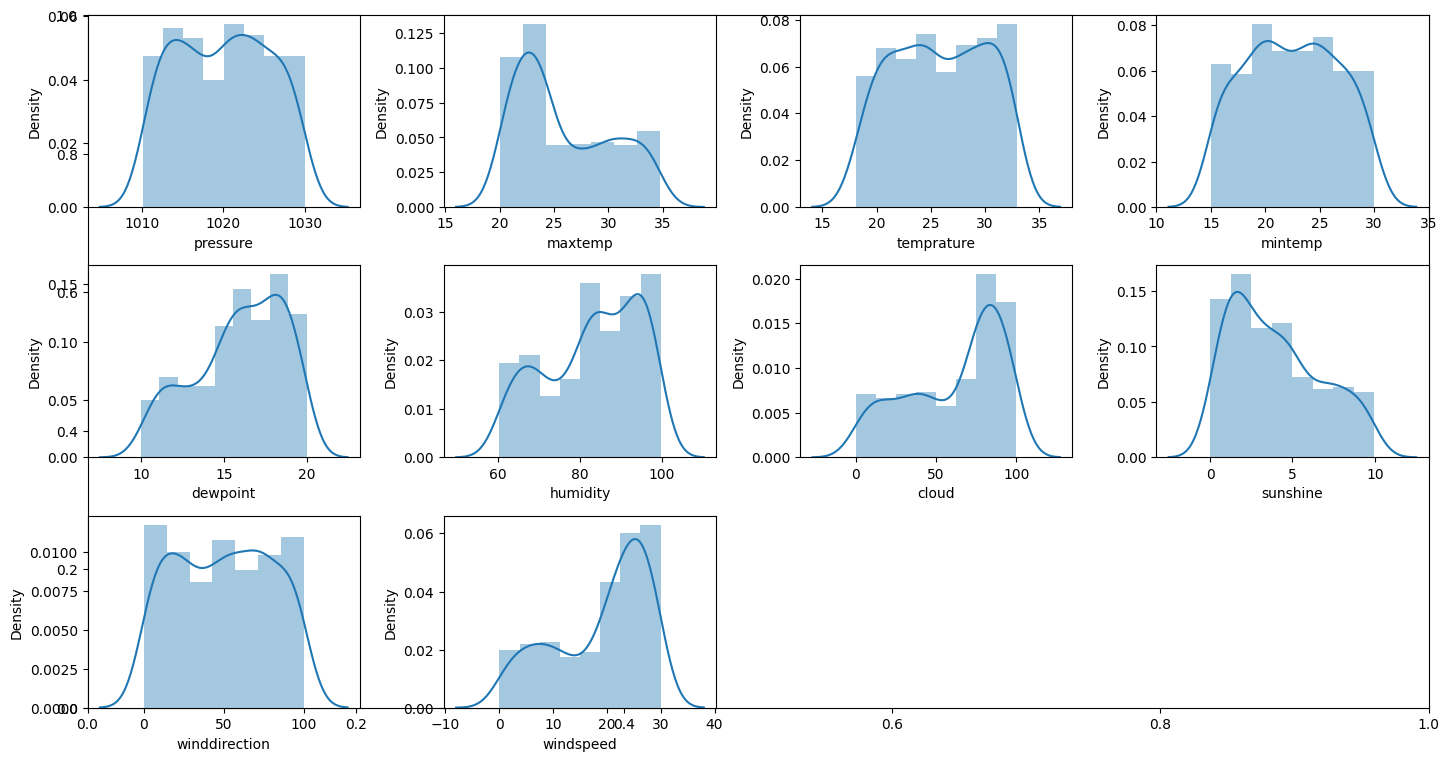

In [92]:
plt.subplots(figsize = (15,8))
for i, col in enumerate(features):
    plt.subplot(3,4,i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

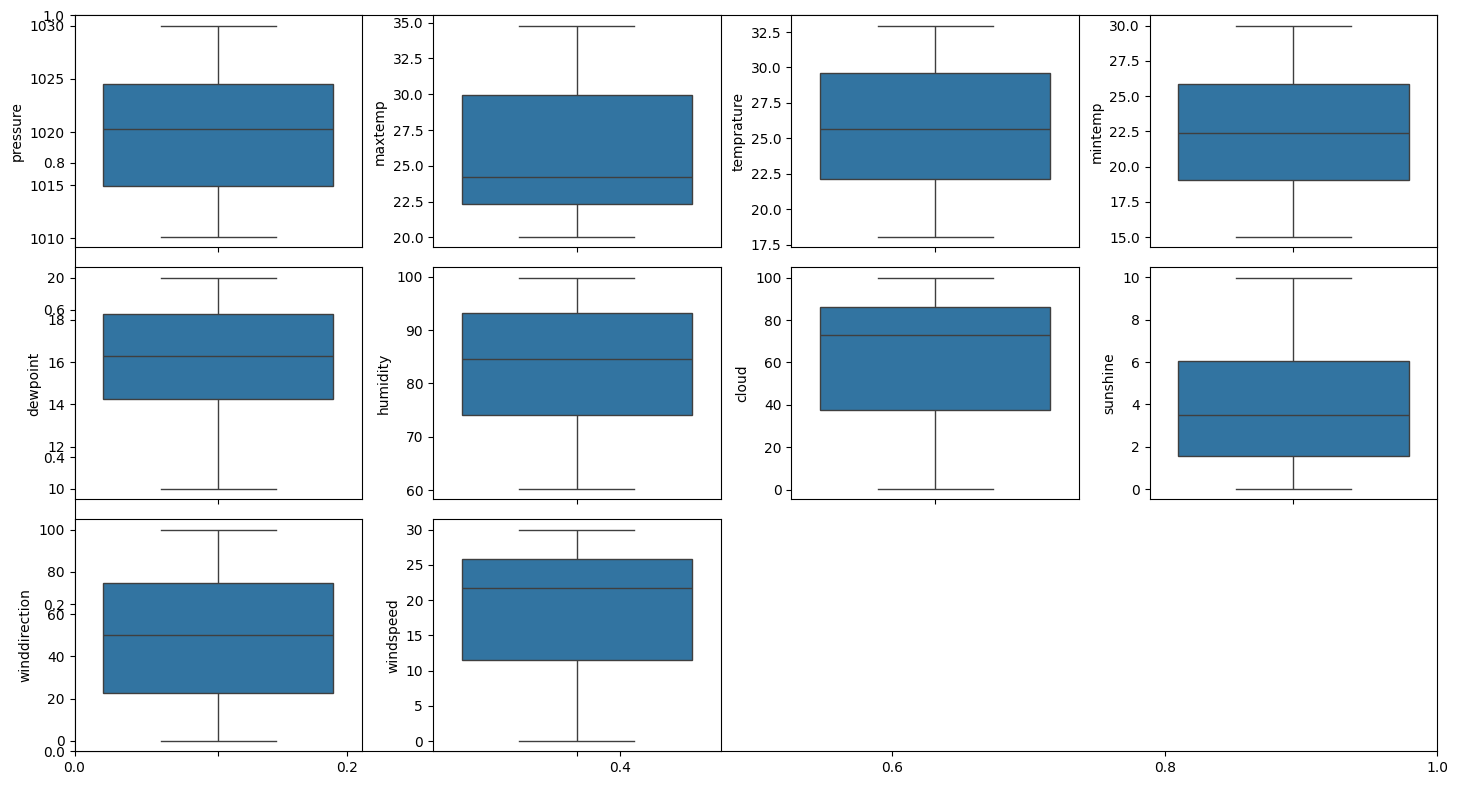

In [93]:
plt.subplots(figsize = (15,8))
for i,col in enumerate(features):
    plt.subplot(3,4,i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [94]:
#Replacing yes with 1 and no with 0 in rainfall columns.
df.replace({'yes':1, 'no':0}, inplace=True)


In [95]:
df.rainfall

0      0
1      1
2      0
3      1
4      1
      ..
360    0
361    0
362    1
363    0
364    0
Name: rainfall, Length: 365, dtype: int64

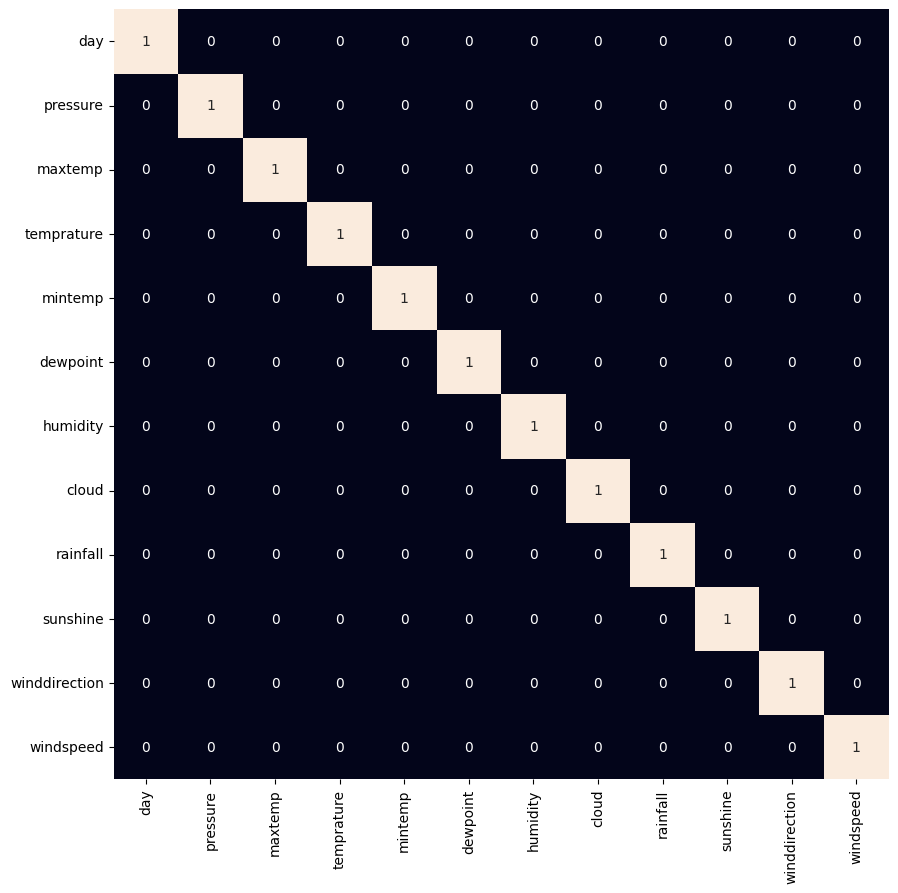

In [96]:
#Checking for correlation using heatmap
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,annot=True,cbar=False)
plt.show()

In [97]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [98]:
#Training of the model
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall


In [99]:
X_train, X_val,Y_train, Y_val = train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)


In [100]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [108]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for model in models:
    model.fit(X, Y)
    
    model_name = type(model).__name__
    print(f'{model_name} :')
    
    train_preds = model.predict_proba(X)
    train_accuracy = metrics.roc_auc_score(Y, train_preds[:, 1])
    print(f'Training Accuracy :  {train_accuracy}')
    
    val_preds = model.predict_proba(X_val)
    val_accuracy = metrics.roc_auc_score(Y_val, val_preds[:, 1])
    print(f'Validation Accuracy :  {val_accuracy}')
    print()

LogisticRegression :
Training Accuracy :  0.9822714681440443
Validation Accuracy :  0.9885433715220949

XGBClassifier :
Training Accuracy :  1.0
Validation Accuracy :  0.9877250409165304

SVC :
Training Accuracy :  0.9950969529085872
Validation Accuracy :  0.997545008183306



In [109]:
# # Calculate Accuracy Scores
# train_accuracy = accuracy_score(Y, train_preds) * 100
# val_accuracy = accuracy_score(Y_val, val_preds) * 100
    
# print(f'Training Accuracy :  {train_accuracy:.2f}%')
# print(f'Validation Accuracy :  {val_accuracy:.2f}%')
# print()

Text(0.5, 1.0, 'Confusion Matrix for SVC')

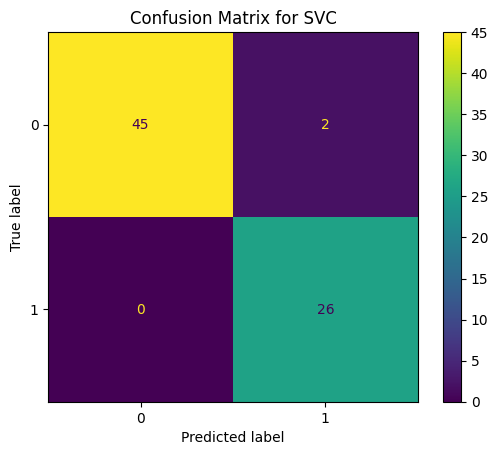

In [110]:
cm = confusion_matrix(Y_val, val_preds_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix for {model_name}')
